The Mean MSE for our Dataset is: 0.11461647597580019
             feature  importance
21               PPE    0.147481
18           spread1    0.111556
0        MDVP:Fo(Hz)    0.092874
2       MDVP:Flo(Hz)    0.065176
19           spread2    0.055777
1       MDVP:Fhi(Hz)    0.052304
7         Jitter:DDP    0.041746
11      Shimmer:APQ5    0.038052
20                D2    0.036167
16              RPDE    0.034268
5           MDVP:RAP    0.033910
14               NHR    0.032748
17               DFA    0.031814
4   MDVP:Jitter(Abs)    0.030544
8       MDVP:Shimmer    0.029405
12          MDVP:APQ    0.029205
15               HNR    0.026468
9   MDVP:Shimmer(dB)    0.024679
13       Shimmer:DDA    0.023336
10      Shimmer:APQ3    0.022472
3     MDVP:Jitter(%)    0.020044
6           MDVP:PPQ    0.019974


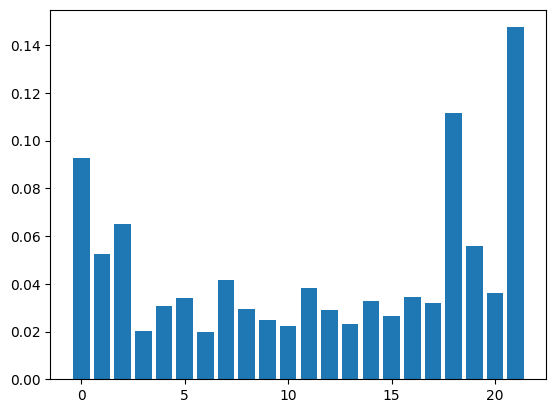

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier 

ParkinDF = pd.read_csv("C:/Users/blueg/Desktop/Stat learning Project/parkinsons.data")

ParkinDF = ParkinDF.iloc[: , 1:]
# Extract the features and target variable
x = ParkinDF.drop(['status'], axis=1)
y = ParkinDF['status']

# Initialize the LOOCV object
loo = LeaveOneOut()

# Initialize an empty list to store the MSEs
mse_list = []

# Loop through each data point
for train_index, test_index in loo.split(x):
    # Split the data into training and test sets
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train a linear regression model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Evaluate the model on the test set
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Compute the mean MSE
mean_mse = sum(mse_list) / len(mse_list)
print('The Mean MSE for our Dataset is:', mean_mse)

# Separate the features and target variable
x = ParkinDF.drop(['status'], axis=1)
y = ParkinDF['status']

# Initialize a random forest classifier
rf = RandomForestClassifier(n_estimators=len(x_train), random_state=42)

# Fit the classifier on the data
rf.fit(x, y)

# Get the feature importances
importances = rf.feature_importances_

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

# Sort the dataframe by feature importance in descending order
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Print the feature importances
print(feature_importances)

plt.bar([x for x in range(len(importances))], importances)
plt.show()

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

ParkinDF = pd.read_csv("C:/Users/blueg/Desktop/Stat learning Project/parkinsons.data")

ParkinDF = ParkinDF.iloc[: , 1:]
# Extract the features and target variable
x = ParkinDF.drop(['status'], axis=1)
y = ParkinDF['status']

# Initialize the LOOCV object
loo = LeaveOneOut()

# Convert continuous target variable to binary
y_binary = np.where(y > 0, 1, 0)

# Initialize an empty list to store the accuracies
accuracy_list = []

# Loop through each data point
for train_index, test_index in loo.split(x):
    # Split the data into training and test sets
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y_binary[train_index], y_binary[test_index]

    # Train a logistic regression model
    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)

    # Evaluate the model on the test set
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Compute the mean accuracy
mean_accuracy = sum(accuracy_list) / len(accuracy_list)
print('The Mean Accuracy for our Dataset is:', mean_accuracy)


The Mean Accuracy for our Dataset is: 0.8512820512820513


In [120]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
ParkinDF = pd.read_csv("C:/Users/blueg/Desktop/Stat learning Project/parkinsons.data")

# Extract the features and target variable
X = ParkinDF.iloc[:, 1:]  # All features
y = ParkinDF['status']

# Select 5 features
selected_features = ['PPE', 'spread1', 'MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'spread2']
X = X[selected_features]

# Initialize the LOOCV object
loo = LeaveOneOut()

# Initialize an empty list to store the accuracies
accuracy_list = []

# Loop through each data point
for train_index, test_index in loo.split(X):
    # Split the data into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train a logistic regression model
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Compute the mean accuracy
mean_accuracy = sum(accuracy_list) / len(accuracy_list)
print('The Mean Accuracy for our Dataset is:', mean_accuracy)


The Mean Accuracy for our Dataset is: 0.8512820512820513


In [59]:
from sklearn import preprocessing
import statsmodels.api as sm
ParkinDF.head(195)

#logit_model = sm.Logit(y,X)
#result = logit_model.fit()
#print(result)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
